## 이미지
- 이미지 확장자 JPEG와 PNG는 서로 채널이 다르다.
- JPEG 3채널, PNG 4채널
- PNG는 RGB외에 투명도에 대한 알파채널이 있다.
- 이미지 확장자를 믿으면 안된다.<br>이미지 본래의 확장자와 이름에 표기된 확장자는 서로 다를 수 있다.
- 파일 헤더의 정보로 파일의 종류를 정확히 알아야 한다.
<br><br>
*색상 시스템*
- RGB red green blue 영상용 255
- CMYK cyan magenta yellow black 인쇄용 100
- Lab luminosity 100, a(red green) b(blue yellow) 125
<br><br>
*PIL python image library*
- 이미지 프로세싱 라이브러리

#### 기본

<class 'PIL.PngImagePlugin.PngImageFile'> (156, 198, 4)
<class 'numpy.ndarray'> uint8
PNG
16진수 : 89504e470d0a1a0a0000000d49484452


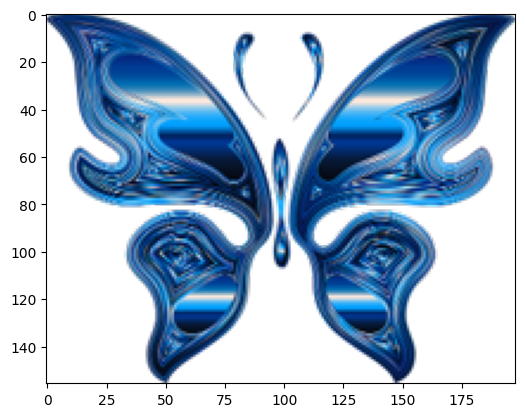

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
nabiAdr = 'c:/dataLec/img/나비.png'
nabi = Image.open(nabiAdr)

# png, 156행 198열 4채널
print(type(nabi), np.shape(nabi))

# 이미지를 어레이에 넣어서 차트로 보기
imgArr = np.array(nabi)
print(type(imgArr), imgArr[0].dtype) # 어레이에 넣으니까 dtype 확인가능
plt.imshow(imgArr)

# 헤더 확인
# import imghdr
# print(imghdr.what(nabiAdr)) deprecated
print(nabi.format)


# 16진수로 읽어서 확인할 수도 있다
with open(nabiAdr,'rb') as f:
    data = f.read(16)
print('16진수 :',data.hex())

#### 가짜 이미지 포맷 확인

- 딥러닝 이미지 구축할 때 3채널과 4채널을 하나의 어레이로 묶으면 문제가 됨
- 이미지 파일을 3채널인 jpg로 저장하거나, 파일 복구로 헤더값 통일하기
<br><br>
- glob()은 파일의 주소까지 불러온다

In [22]:
from glob import glob
fileList = glob('c:/dataLec/img/*.png') # png만 여러개 불러오기

for x in fileList:
    img = Image.open(x)
    print('\n***파일명 :',x, '/ 파일 헤더 :',img.format)


    # 16진수로 확읺 가능
    with open(x, 'rb') as f:
        data = f.read(16)
    print(data.hex())


***파일명 : c:/dataLec/img\cells.png / 파일 헤더 : PNG
89504e470d0a1a0a0000000d49484452

***파일명 : c:/dataLec/img\pen.png / 파일 헤더 : PNG
89504e470d0a1a0a0000000d49484452

***파일명 : c:/dataLec/img\rice.png / 파일 헤더 : PNG
89504e470d0a1a0a0000000d49484452

***파일명 : c:/dataLec/img\Taegeuk_result.png / 파일 헤더 : PNG
89504e470d0a1a0a0000000d49484452

***파일명 : c:/dataLec/img\고등어.png / 파일 헤더 : PNG
89504e470d0a1a0a0000000d49484452

***파일명 : c:/dataLec/img\나비.png / 파일 헤더 : PNG
89504e470d0a1a0a0000000d49484452


#### 채널 수 다를 때 에러

In [30]:
fileList = glob('c:/dataLec/img/*')
res = []

for x in fileList:
    img = Image.open(x).resize((100,100))
    img = np.array(img)
    print(x, img.shape) 
    res.append(img)

np.shape(res)

# 어레이 -> img.shape
# 리스트 -> np.shape(img))
# 리스트 -> img = np.array(img) 어레이화 -> img.shape

c:/dataLec/img\cells.png (100, 100, 3)
c:/dataLec/img\lena_color.bmp (100, 100, 3)
c:/dataLec/img\pen.png (100, 100, 4)
c:/dataLec/img\rice.png (100, 100, 3)
c:/dataLec/img\Taegeuk.bmp (100, 100, 3)
c:/dataLec/img\Taegeuk_result.png (100, 100, 4)
c:/dataLec/img\고등어.png (100, 100, 4)
c:/dataLec/img\나비.png (100, 100, 4)


c:\Users\user\miniconda3\envs\py\Lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


ValueError: could not broadcast input array from shape (100,100,3) into shape (100,100)

#### 채널이 4인 이미지만 모아보기

['c:/dataLec/img\\cells.png', 'c:/dataLec/img\\pen.png', 'c:/dataLec/img\\rice.png', 'c:/dataLec/img\\Taegeuk_result.png', 'c:/dataLec/img\\고등어.png', 'c:/dataLec/img\\나비.png']
(4, 100, 100, 4)


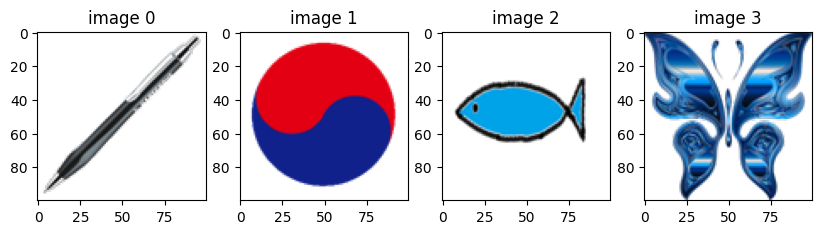

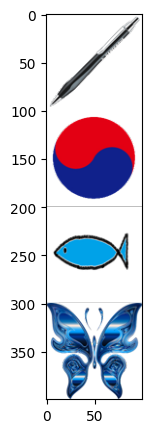

In [57]:
fileList = glob('c:/dataLec/img/*.png')
print(fileList)
res = []
for x in fileList:
    img = Image.open(x).resize((100,100))
    img = np.array(img)

    if img.shape[2] == 4:
        res.append(img)

# 리스트에 담긴 이미지 값들
print(np.shape(res))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) # 차트의 크기
cnt = len(res) # len은 무조건 첫번째 요소의 데이터

for count,x in enumerate(res):
    plt.subplot(1,cnt,count+1)
    plt.imshow(x)
    plt.title('image '+ str(count))

# figure를 한번 더 쓰면 차트가 불리됨
plt.figure(figsize=(20,5)) 
plt.imshow(np.vstack(res[:]))

#### 이미지 스케일링

['c:/dataLec/img\\cells.png', 'c:/dataLec/img\\pen.png', 'c:/dataLec/img\\rice.png', 'c:/dataLec/img\\Taegeuk_result.png', 'c:/dataLec/img\\고등어.png', 'c:/dataLec/img\\나비.png']
(4, 100, 100, 4)
[0.12156863 0.1254902  0.12941176 1.        ]


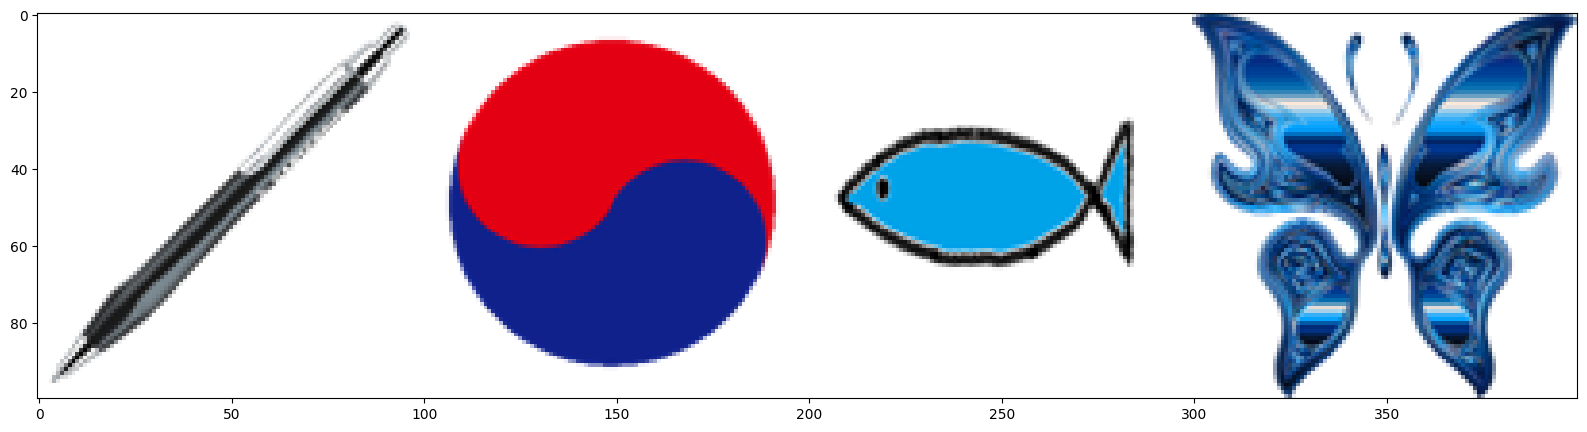

In [61]:
fileList = glob('c:/dataLec/img/*.png')
print(fileList)
res = []
for x in fileList:
    img = Image.open(x).resize((100,100))
    img = np.array(img)

    if img.shape[2] == 4:
        # 리스트에 담을 때 스케일링
        res.append(img/255) 

# 리스트에 담긴 이미지 값들
print(np.shape(res))
print(res[0][50][50])

plt.figure(figsize=(20,5))
plt.imshow(np.hstack(res[:]))

#### 이미지 numpy 변환하여 저장

##### npy

In [62]:
np.save('c:/dataLec/npz/res.npy', res)

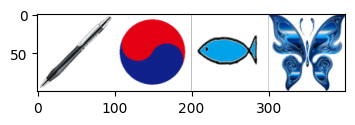

In [68]:
img = np.load('c:/dataLec/npz/res.npy')
plt.figure(figsize=(10,1))
plt.imshow(np.hstack(res[:]))

##### npz

- 레이블와 이미지를 동시에 저장

In [72]:
img1 = np.zeros((8,8,3))
img2 = np.ones((8,8,3))
lable1 = 'black'
lable2 = 'white'

x = []
x.append(img1)
x.append(img2)
y = []
y.append(lable1)
y.append(lable2)

np.savez('res.npz', xData=x, yData=y) #savez

In [76]:
data = np.load('res.npz')
print(data)
print(list(data)) # npz 파일의 키값
xVal = data['xData']
yVal = data['yData']
print(xVal, yVal)

['xData', 'yData']
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1

#### 이미지 색상값 변화
- 브로드캐스트로 연산한다

(512, 512, 3)
[[226 137 125]
 [226 137 125]
 [223 137 133]
 ...
 [230 148 122]
 [221 130 110]
 [200  99  90]]
[[ 36 194 106]
 [ 36 194 106]
 [142 194 250]
 ...
 [236 232 212]
 [ 42 100 124]
 [ 16  86 148]]
[[11300  6850  6250]
 [11300  6850  6250]
 [11150  6850  6650]
 ...
 [11500  7400  6100]
 [11050  6500  5500]
 [10000  4950  4500]]
[[[11300  6850  6250]
  [11300  6850  6250]
  [11150  6850  6650]
  ...
  [11500  7400  6100]
  [11050  6500  5500]
  [10000  4950  4500]]]


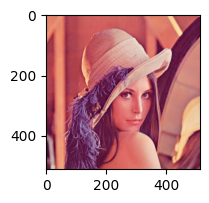

In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open('c:/dataLec/img/lena_color.bmp')
img = np.array(img)

print(img.shape) # 512,512,3

print(img[0])
print(img[0] * 50) # 배열 구조가 안맞아서 값이 이상하게 들어감
print(img[0] * [50,50,50]) # 이렇게 배열 구조를 맞춰줘야 함
print(img[0] * [[[50]]]) # RGB 설정을 한번에 하는 방법

plt.figure(figsize=(10,2))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(10, 512, 512, 3)


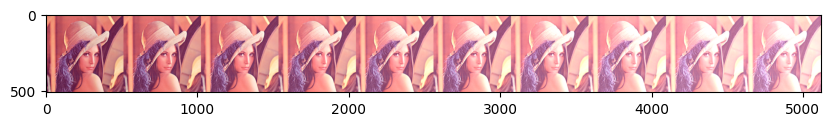

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

fileAdr = 'c:/dataLec/img/*'
fileList = glob(fileAdr)
img = Image.open(fileList[1]).resize((512,512))
imgArr = np.array(img)

res = []

for x in range(10):
  # 바르지 않은 예:
  # imgArr += 10
  # imgArr += [10,10,10]
  imgArr = imgArr + [10,10,10]
  res.append(imgArr)

print(np.shape(res))
plt.figure(figsize=(10,3))
plt.imshow(np.hstack(res[:]))

#### RGB 점점 줄여보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


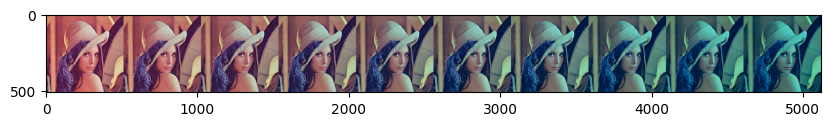

In [86]:
resRed = []
imgArrRed = np.array(img)
for x in range(10):
    imgArrRed = imgArrRed - [15,0,0]
    resRed.append(imgArrRed)
plt.figure(figsize=(10,3))
plt.imshow(np.hstack(resRed[:]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


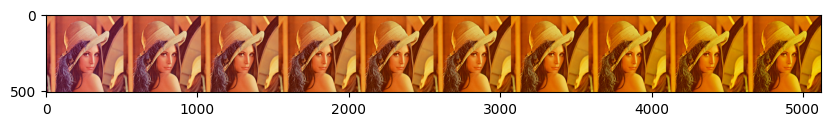

In [89]:
resBlue = []
imgArrBlue = np.array(img)
for x in range(10):
    imgArrBlue = imgArrBlue - [0,0,15]
    resBlue.append(imgArrBlue)
plt.figure(figsize=(10,3))
plt.imshow(np.hstack(resBlue[:]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


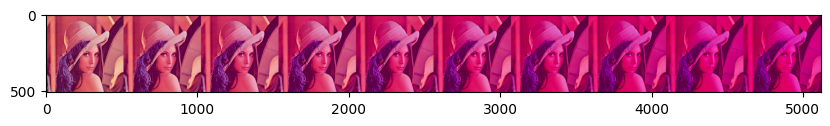

In [91]:
resGreen = []
imgArrGreen = np.array(img)
for x in range(10):
    imgArrGreen = imgArrGreen - [0,15,0]
    resGreen.append(imgArrGreen)
plt.figure(figsize=(10,3))
plt.imshow(np.hstack(resGreen[:]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


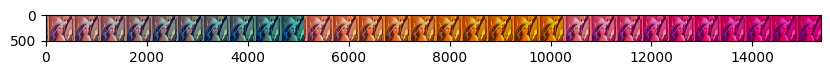

In [98]:
resTotal = resRed + resBlue + resGreen

plt.figure(figsize=(10,10))
plt.imshow(np.hstack(resTotal))

#### 스케일링 차이

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'normal/127-1')

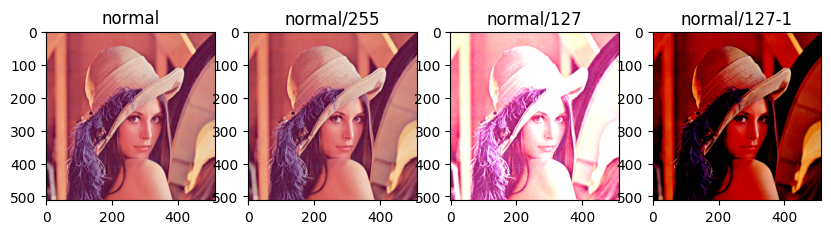

In [120]:
resArrSc = np.array(img)

plt.figure(figsize=(10,10))

plt.subplot(1,4,1)
plt.imshow(resArrSc)
plt.title('normal'
          )
plt.subplot(1,4,2)
plt.imshow(resArrSc/255)
plt.title('normal/255')

plt.subplot(1,4,3)
plt.imshow(resArrSc/127)
plt.title('normal/127')

plt.subplot(1,4,4)
plt.imshow(resArrSc/127-1)
plt.title('normal/127-1')# 명함대비 강하게 (어두운 건 더욱 어둡고, 밝은 건 밝게)



#### 이미지 크롭

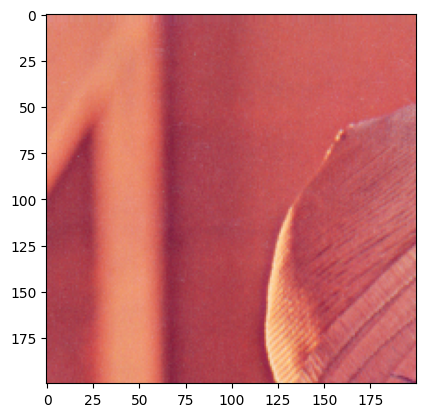

In [124]:
# plt.show(img[:200,:300,:]) # img 파일 자체는 안됨
plt.imshow(np.array(img)[:200,:200,:])